In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from itertools import cycle, islice

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [2]:
df = pd.read_csv('customerGroups.csv')

# 0. Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6620 entries, 0 to 6619
Data columns (total 71 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   g1_1    6620 non-null   float64
 1   g1_2    6620 non-null   int64  
 2   g1_3    6620 non-null   int64  
 3   g1_4    6620 non-null   int64  
 4   g1_5    6620 non-null   int64  
 5   g1_6    6620 non-null   int64  
 6   g1_7    6620 non-null   int64  
 7   g1_8    6620 non-null   int64  
 8   g1_9    6620 non-null   int64  
 9   g1_10   6620 non-null   int64  
 10  g1_11   6620 non-null   int64  
 11  g1_12   6620 non-null   int64  
 12  g1_13   6620 non-null   float64
 13  g1_14   6620 non-null   float64
 14  g1_15   6620 non-null   float64
 15  g1_16   6620 non-null   float64
 16  g1_17   6620 non-null   float64
 17  g1_18   6620 non-null   float64
 18  g1_19   6620 non-null   float64
 19  g1_20   6620 non-null   float64
 20  g1_21   6620 non-null   float64
 21  g2_1    6620 non-null   float64
 22  

In [39]:
pd.set_option('display.max_columns', None)

In [40]:
df.describe()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,g1_11,g1_12,g1_13,g1_14,g1_15,g1_16,g1_17,g1_18,g1_19,g1_20,g2_1,g2_2,g2_3,g2_4,g2_5,g2_6,g2_7,g2_8,g2_9,g2_10,g2_11,g2_12,g2_13,g2_14,g2_15,g2_16,g2_17,g2_18,g2_19,g2_20,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,c_14,c_15,c_16,c_17,c_18,c_19,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27
count,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.00000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.00000,6620.000000,6620.000000,6620.000000
mean,2.708779,14.424018,10.485650,24.909668,10.988066,13.412085,10.161027,10.745468,14.169033,3.251057,-3.423565,-0.172508,3.154143,3.043544,10.268756,4.736862,1.121263,1.159848,0.205070,0.058852,4.809875,15.113897,10.018580,25.132477,11.025076,14.040634,10.633837,10.253323,13.500453,3.406798,-3.247130,0.159668,3.183453,3.050268,4.840590,1.151021,1.125410,0.205567,0.058207,0.448996,1.88984,1.563595,1.558761,3.122356,0.183686,0.200906,0.183686,0.200906,1.945808,4.405438,-4.628248,-0.222810,-0.088369,-0.092296,0.111631,0.128399,6.498187,-6.830363,-0.332175,-0.029311,-0.006724,-0.004147,0.008827,0.00000,-0.228426,-0.103728,0.000408
std,1.857725,10.700787,8.384203,18.174948,5.635985,10.090030,7.495039,7.964247,9.866734,8.481210,8.580752,15.036306,0.931224,0.825628,3.760524,2.127352,0.580622,0.566745,0.273416,0.151767,3.937164,10.836923,8.251602,18.190664,5.666965,10.205415,7.563664,7.831935,9.722428,8.750434,8.313375,15.025919,0.928835,0.823931,2.150843,0.588387,0.552912,0.273798,0.151470,0.139194,0.22708,4.063520,4.057417,3.939467,0.387257,0.400708,0.387257,0.400708,1.217214,8.497254,9.093944,14.470732,7.466654,6.378463,6.343190,7.420718,12.175872,12.973601,21.498095,1.220752,1.068199,0.663238,0.683422,0.32287,3.390902,1.944419,0.092761
min,1.050000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-27.000000,-38.000000,-65.000000,0.000000,0.172875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.950000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-27.000000,-36.000000,-63.000000,0.000000,0.216094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-10.000000,-10.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.000000,-47.000000,-63.000000,-33.000000,-29.000000,-28.000000,-40.000000,-39.000000,-74.000000,-101.000000,-4.684111,-4.319826,-2.512919,-3.118836,-2.00000,-15.202740,-9.181722,-0.750000
25%,1.667000,6.000000,4.000000,10.000000,6.000000,5.000000,4.000000,4.000000,6.000000,-2.000000,-8.000000,-8.250000,2.499106,2.493665,8.512643,3.389698,0.735749,0.780218,0.011054,0.001827,2.500000,6.000000,3.000000,11.000000,6.000000,6.000000,4.000000,4.000000,5.000000,-2.000000,-8.000000,-8.000000,2.500000,2.500000,3.470612,0.760000,0.758589,0.011054,0.001827,0.347931,1.74000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.901358,0.000000,-9.000000,-7.000000,-4.000000,-3.000000,-3.000000,-3.000000,-1.000000,-13.000000,-10.000000,-0.716407,-0.531224,-0.440407,-0.406811,0.00000,-2.222226,-1.293471,-0.054331
50%,2.150000,13.000000,9.000000,22.000000,11.000000,12.000000,9.000000,9.000000,13.000000,1.000000,-2.000000,-1.000000,2.905237,2.764749,10.539520,4.675946,1.079138,1.156497,0.065102,0.006409,3.500000,14.000000,8.000000,22.000000,11.000000,13.000000,10.000000,9.000000,12.000000,1.000000,-2.000000,-1.000

In [6]:
df.head()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,g1_11,g1_12,g1_13,g1_14,g1_15,g1_16,g1_17,g1_18,g1_19,g1_20,g1_21,g2_1,g2_2,g2_3,g2_4,g2_5,g2_6,g2_7,g2_8,g2_9,g2_10,g2_11,g2_12,g2_13,g2_14,g2_15,g2_16,g2_17,g2_18,g2_19,g2_20,g2_21,c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,c_14,c_15,c_16,c_17,c_18,c_19,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
0,4.50,1,3,4,5,1,1,4,6,0,-2,-2,2.505032,2.551406,6.240000,3.608000,0.744000,1.216000,0.003078,0.003028,0.578205,1.83,6,0,6,7,4,0,0,1,4,-1,3,2.888736,2.616855,5.552000,0.728000,0.160000,0.002994,0.002953,0.586149,3.50,1.97,-1,7,6,0,0,0,1,3.223605,1,-3,-2,0,1,4,2,1,-6,-5,-0.383704,-0.065449,0.584000,0.488000,0,-3.232000,-1.944000,-0.007944,1.76,2
1,2.20,24,22,46,10,24,28,18,22,-4,-4,-8,3.718983,3.882271,7.423435,5.048030,0.836178,1.975244,0.784882,0.019448,0.680013,2.80,34,14,48,10,25,16,16,24,9,-8,1,4.065822,4.042015,6.369385,1.511704,1.783791,0.784882,0.033373,0.498949,3.25,1.85,2,1,3,0,0,0,0,1.541039,10,-12,-2,0,12,2,-3,4,-13,-9,-0.346839,-0.159744,-0.947614,0.463540,0,-5.342174,-1.321355,0.181064,1.85,1
2,12.00,7,4,11,18,8,11,2,10,-3,-8,-11,2.244550,2.458087,11.091399,5.853005,0.730046,2.022004,0.043937,0.014264,0.527707,1.30,11,18,29,2,13,3,16,1,10,15,25,4.918483,4.050389,10.029408,2.489174,0.204741,0.022247,0.042004,0.567984,5.00,1.70,-5,10,5,0,0,0,1,2.049024,-11,-7,-18,7,-5,-1,-3,-18,-18,-36,-2.673934,-1.592303,0.525305,-0.467169,0,-6.566521,-4.176403,-0.040277,2.05,2
3,1.91,8,5,13,14,6,7,6,9,-1,-3,-4,2.580190,2.683092,9.864426,2.582357,0.656638,1.407549,0.041563,0.021386,0.261785,4.50,5,3,8,17,5,9,7,16,-4,-9,-13,1.964163,2.278147,3.369489,0.665585,2.163561,0.043937,0.010358,0.273886,3.60,1.98,-1,3,2,0,0,0,0,2.284503,5,0,5,-10,0,-3,4,8,1,9,0.616027,0.404945,-1.506923,0.741964,0,-2.438120,-0.787132,-0.012101,1.82,0
4,2.50,23,16,39,14,33,25,18,27,8,-9,-1,3.470617,3.055989,11.672962,4.554560,1.895740,1.237122,0.941241,0.000062,0.390180,3.00,29,23,52,8,31,22,21,23,9,-2,7,4.527831,4.215284,4.494986,1.419174,1.144728,0.364776,0.008148,0.347568,3.40,1.80,-3,2,-1,1,0,0,0,2.648418,0,-13,-13,10,4,-4,-4,10,-18,-8,-1.057214,-1.159294,0.751012,-0.182052,0,-1.259728,0.059574,0.042613,1.99,2


In [7]:
df.isna().sum().sum() # check for null values

0

In [8]:
df['target'].unique() # check for errors if target have only described categories

array([2, 1, 0], dtype=int64)

In [9]:
df.columns

Index(['g1_1', 'g1_2', 'g1_3', 'g1_4', 'g1_5', 'g1_6', 'g1_7', 'g1_8', 'g1_9',
       'g1_10', 'g1_11', 'g1_12', 'g1_13', 'g1_14', 'g1_15', 'g1_16', 'g1_17',
       'g1_18', 'g1_19', 'g1_20', 'g1_21', 'g2_1', 'g2_2', 'g2_3', 'g2_4',
       'g2_5', 'g2_6', 'g2_7', 'g2_8', 'g2_9', 'g2_10', 'g2_11', 'g2_12',
       'g2_13', 'g2_14', 'g2_15', 'g2_16', 'g2_17', 'g2_18', 'g2_19', 'g2_20',
       'g2_21', 'c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'c_7', 'c_8', 'c_9',
       'c_10', 'c_11', 'c_12', 'c_13', 'c_14', 'c_15', 'c_16', 'c_17', 'c_18',
       'c_19', 'c_20', 'c_21', 'c_22', 'c_23', 'c_24', 'c_25', 'c_26', 'c_27',
       'c_28', 'target'],
      dtype='object')

In [10]:
# changing type of columns to same float64 (int64 -> float64)
#       except for target column
for i in df:
    if i != 'target':
        if df[i].dtype == 'int64':
            df[i] = df[i].astype('float64')
    else:
        df[i] = df[i].astype('category')

In [11]:
#df.info()

looking for some strong correlations

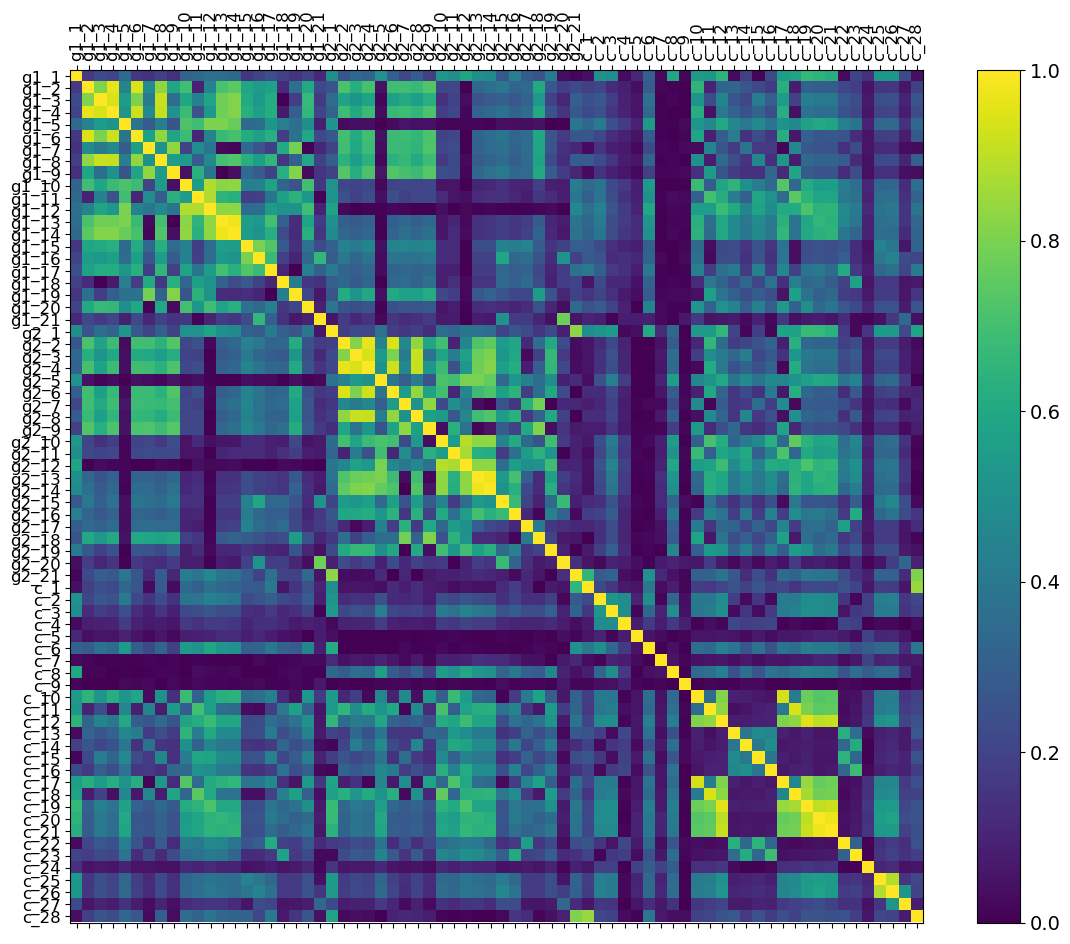

In [12]:
corr = df.corr()
f = plt.figure(figsize=(14, 11))
plt.matshow(corr.abs(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.show(f)

# Q1.  What percentage of campaigns led to group 1 being the most profitable? What about group 2? And neither of the groups?

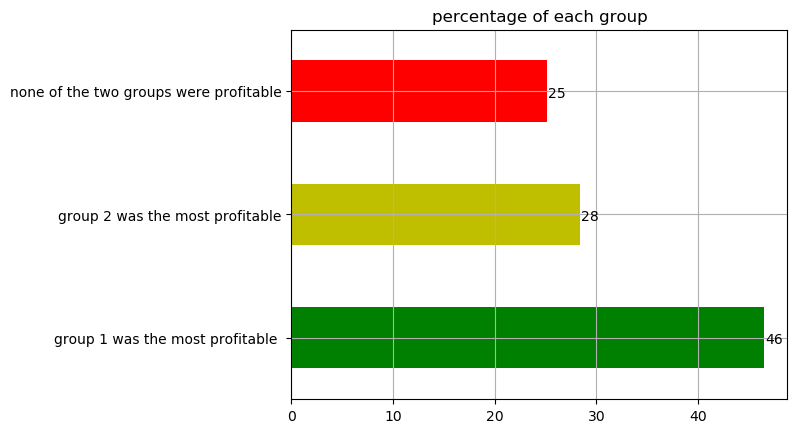

In [13]:

target_vis = df.target.value_counts(normalize=True)*100
target_vis = target_vis.rename({0: 'none of the two groups were profitable', 1: 'group 1 was the most profitable ', 2: 'group 2 was the most profitable'})
my_colors = list(islice(cycle(['g', 'y', 'r']), None, len(df)))
ax = target_vis.plot.barh(title='percentage of each group', grid = True, color = my_colors)
for p in ax.patches:
    ax.annotate(str(int(p.get_width())), (p.get_width() + 0.1, p.get_y() + 0.2,))


# Q2.  Based on all the information you have, can you build a model to optimize future campaigns? Given the characteristics of two different groups of customers, please predict which group to target

In [14]:
df = df.drop(['g1_21', 'g2_21', 'c_28'], axis = 1, errors='ignore')
Y = df['target']
X = df.drop(['target'],axis=1)

### normalization

In [15]:
trans = MinMaxScaler()
X_trans = trans.fit_transform(X)
X_train, X_test,y_train,y_test = train_test_split(X_trans, Y, test_size = 0.25)

In [17]:
def model_tester2(model_name ,X_tr, y_tr, X_te, conf_matrix, func_args):
    if len(func_args) != 0:
        model = model_name(**func_args)
    else:
        model = model_name()
    model.fit(X_tr, y_tr)

    y_pred = model.predict(X_te)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')


    if conf_matrix == True:
        print("Accuracy:", accuracy)
        cm = confusion_matrix(y_test, y_pred)
        ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    else:
        pass

    return str(model_name), accuracy, precision, recall, f1

### Feature selection (numeric input, categorical output)

In [18]:
### Feature Selection (numeric input, categorical output)
def top_x_by_fclassif(x):
	fs = SelectKBest(score_func=f_classif, k=x)
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return fs, X_train_fs, X_test_fs

fs, X_train_fs, X_test_fs = top_x_by_fclassif(15)


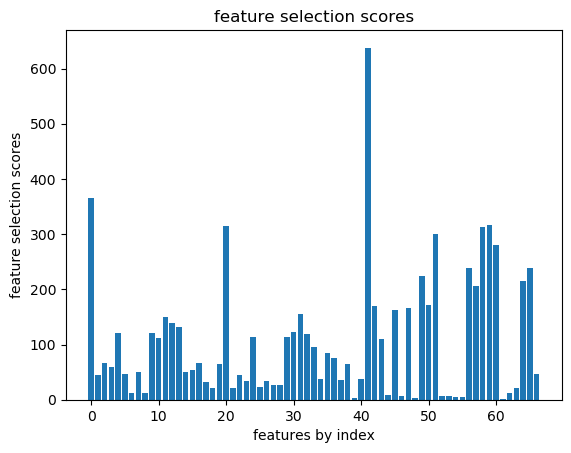

In [19]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title('feature selection scores')
plt.xlabel('features by index')
plt.ylabel('feature selection scores')
plt.show()

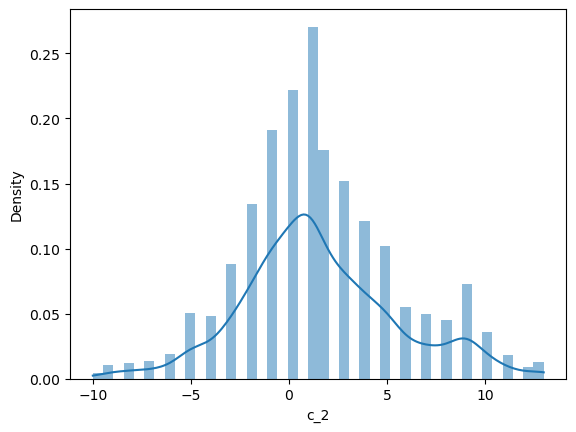

In [20]:
arr = np.amax(fs.scores_)
result = np.where(fs.scores_ == arr)
best_feature = X.columns[result[0][0]]

sns.histplot(df[best_feature], kde=True, stat="density", linewidth=0)

I did not choose any deep learning model because I believe the data is not complex enough to make it necessary/beneficial.

In [21]:
models_dict = {LogisticRegression : {}, RandomForestClassifier : {}, SVC : {'C': 1.0, 'kernel': "linear"},  GaussianNB: {}, GradientBoostingClassifier : {},  XGBClassifier : {}, LGBMClassifier: {}, CatBoostClassifier : {'verbose':0}}

In [22]:
# selecting x features to test model on

fs_15, X_train_fs_15, X_test_fs_15 = top_x_by_fclassif(15)
#fs_10, X_train_fs_10, X_test_fs_10 = top_x_by_fclassif(10)
#fs_5, X_train_fs_5, X_test_fs_5 = top_x_by_fclassif(5)
fs_3, X_train_fs_3, X_test_fs_3 = top_x_by_fclassif(3)
fs_train_list = [X_train, X_train_fs_15, X_train_fs_3]
fs_test_list = [X_test, X_test_fs_15, X_test_fs_3]


testing different algorithms with different number of fearures

In [23]:
%%capture
models_metrics = {}
for model, model_args in models_dict.items():
    for X_train_fs, X_test_fs in zip(fs_train_list, fs_test_list):
        name, accuracy, precision, recall, f1 = model_tester2(model, X_train_fs, y_train, X_test_fs, False, model_args);
        
        models_metrics[str(model).split("'")[1].split(".")[-1] + ' with ' + str(X_train_fs.shape[1]) + ' features'] = [accuracy, precision, recall, f1];

In [24]:
models_metrics_df = pd.DataFrame.from_dict(models_metrics, orient='index', columns=[ 'accuracy', 'precision', 'recall', 'f1'])
models_metrics_df.style.highlight_max(color = 'green', axis = 0)

,accuracy,precision,recall,f1
LogisticRegression with 67 features,0.581873,0.525221,0.581873,0.512240
LogisticRegression with 15 features,0.575227,0.431065,0.575227,0.490267
LogisticRegression with 3 features,0.575227,0.431868,0.575227,0.489118
RandomForestClassifier with 67 features,0.578248,0.526231,0.578248,0.532396
RandomForestClassifier with 15 features,0.573414,0.535283,0.573414,0.542466
RandomForestClassifier with 3 features,0.524471,0.506845,0.524471,0.513945
SVC with 67 features,0.570997,0.484563,0.570997,0.495217
SVC with 15 features,0.570997,0.429854,0.570997,0.484646
SVC with 3 features,0.571601,0.430937,0.571601,0.484397
GaussianNB with 67 features,0.497281,0.536613,0.497281,0.508437


testing different algorithms with different number of fearures with use of cross validation

In [25]:
%%capture
models_metrics = {}
for model, model_args in models_dict.items():
    for X_train_fs, X_test_fs in zip(fs_train_list, fs_test_list):

        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        n_scores = cross_val_score(model(), X_train_fs, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

        models_metrics[str(model).split("'")[1].split(".")[-1] + str(X_train_fs.shape[1])] = ['%.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores))]#, accuracy, precision, recall, f1];

In [26]:
models_metrics_df = pd.DataFrame.from_dict(models_metrics, orient='index', columns=['accuracy (std)'])#, 'accuracy', 'precision', 'recall', 'f1'])
models_metrics_df.style.highlight_max(color = 'green', axis = 0)

,accuracy (std)
LogisticRegression67,0.573 (0.017)
LogisticRegression15,0.579 (0.015)
LogisticRegression3,0.578 (0.014)
RandomForestClassifier67,0.575 (0.017)
RandomForestClassifier15,0.570 (0.017)
RandomForestClassifier3,0.526 (0.015)
SVC67,0.568 (0.017)
SVC15,0.579 (0.014)
SVC3,0.583 (0.014)
GaussianNB67,0.485 (0.021)


fine tuning best algorithms

In [41]:
GBC_tuning_lr = {GradientBoostingClassifier : [{'learning_rate': 0.01}, {'learning_rate': 0.2}, {'learning_rate': 0.5}, {'learning_rate': 1}]}
GBC_tuning_n_est = {GradientBoostingClassifier : [{'n_estimators': 25}, {'n_estimators': 35}, {'n_estimators': 50}, {'n_estimators': 65}, {'n_estimators': 100}]}
GBC_tuning_max_depth = {GradientBoostingClassifier : [{'max_depth': 1}, {'max_depth': 5}, {'max_depth': 15}]}
GBC_tuning_min_samples_split = {GradientBoostingClassifier : [{'min_samples_split': 0.1}, {'min_samples_split': 0.3}, {'min_samples_split': 1.}]}
GBC_tuning_min_samples_leafs = {GradientBoostingClassifier : [{'min_samples_leaf': 0.1}, {'min_samples_leaf': 0.2}]}
GBC_tuning_max_features = {GradientBoostingClassifier : [{'max_features': 1}, {'max_features': 3}, {'max_features': 10}]}

In [28]:
def model_tuning(model_tuning, fs_train_list, fs_test_list):
    model_metrics = {}
    for model, model_args_list in model_tuning.items():
        for model_args in model_args_list:
            print(model, model_args)
            for X_train_fs, X_test_fs in zip(fs_train_list, fs_test_list):
                name, accuracy, precision, recall, f1 = model_tester2(model, X_train_fs, y_train, X_test_fs, False, model_args);
                
                model_metrics[str(model).split("'")[1].split(".")[-1] + ' with ' + str(X_train_fs.shape[1]) + ' features and model args like ' + str(model_args)] = [accuracy, precision, recall, f1];
    return model_metrics

In [29]:
GBC_model_metrics = model_tuning(GBC_tuning_lr, fs_train_list, fs_test_list)
GBC_model_metrics_df = pd.DataFrame.from_dict(GBC_model_metrics, orient='index', columns=[ 'accuracy', 'precision', 'recall', 'f1'])
GBC_model_metrics_df.style.highlight_max(color = 'green', axis = 0)

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> {'learning_rate': 0.01}


<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> {'learning_rate': 0.2}
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> {'learning_rate': 0.5}
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> {'learning_rate': 1}


,accuracy,precision,recall,f1
GradientBoostingClassifier with 67 features and model args like {'learning_rate': 0.01},0.584290,0.538378,0.584290,0.523809
GradientBoostingClassifier with 15 features and model args like {'learning_rate': 0.01},0.587311,0.544132,0.587311,0.511851
GradientBoostingClassifier with 3 features and model args like {'learning_rate': 0.01},0.586103,0.535354,0.586103,0.513278
GradientBoostingClassifier with 67 features and model args like {'learning_rate': 0.2},0.571601,0.529087,0.571601,0.538138
GradientBoostingClassifier with 15 features and model args like {'learning_rate': 0.2},0.574018,0.531515,0.574018,0.540499
GradientBoostingClassifier with 3 features and model args like {'learning_rate': 0.2},0.580060,0.539695,0.580060,0.547058
GradientBoostingClassifier with 67 features and model args like {'learning_rate': 0.5},0.542598,0.514881,0.542598,0.524640
GradientBoostingClassifier with 15 features and model args like {'learning_rate': 0.5},0.535347,0.506549,0.535347,0.516315
GradientBoostingClassifier with 3 features and model args like {'learning_rate': 0.5},0.552870,0.525485,0.552870,0.532077
GradientBoostingClassifier with 67 features and model args like {'learning_rate': 1},0.537764,0.521874,0.537764,0.528103


In [30]:
GBC_model_metrics = model_tuning(GBC_tuning_n_est, fs_train_list, fs_test_list)
GBC_model_metrics_df = pd.DataFrame.from_dict(GBC_model_metrics, orient='index', columns=[ 'accuracy', 'precision', 'recall', 'f1'])
GBC_model_metrics_df.style.highlight_max(color = 'green', axis = 0)

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> {'n_estimators': 25}
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> {'n_estimators': 35}
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> {'n_estimators': 50}
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> {'n_estimators': 65}
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> {'n_estimators': 100}


,accuracy,precision,recall,f1
GradientBoostingClassifier with 67 features and model args like {'n_estimators': 25},0.586707,0.540444,0.586707,0.542954
GradientBoostingClassifier with 15 features and model args like {'n_estimators': 25},0.584894,0.540673,0.584894,0.545984
GradientBoostingClassifier with 3 features and model args like {'n_estimators': 25},0.587311,0.541767,0.587311,0.546187
GradientBoostingClassifier with 67 features and model args like {'n_estimators': 35},0.586707,0.545745,0.586707,0.545080
GradientBoostingClassifier with 15 features and model args like {'n_estimators': 35},0.584290,0.540624,0.584290,0.545482
GradientBoostingClassifier with 3 features and model args like {'n_estimators': 35},0.589124,0.543720,0.589124,0.548394
GradientBoostingClassifier with 67 features and model args like {'n_estimators': 50},0.578248,0.529306,0.578248,0.535378
GradientBoostingClassifier with 15 features and model args like {'n_estimators': 50},0.583686,0.540766,0.583686,0.546032
GradientBoostingClassifier with 3 features and model args like {'n_estimators': 50},0.589124,0.545217,0.589124,0.549434
GradientBoostingClassifier with 67 features and model args like {'n_estimators': 65},0.580060,0.533749,0.580060,0.539365


In [31]:
GBC_model_metrics = model_tuning(GBC_tuning_max_depth, fs_train_list, fs_test_list)
GBC_model_metrics_df = pd.DataFrame.from_dict(GBC_model_metrics, orient='index', columns=[ 'accuracy', 'precision', 'recall', 'f1'])
GBC_model_metrics_df.style.highlight_max(color = 'green', axis = 0)

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> {'max_depth': 1}
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> {'max_depth': 5}
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> {'max_depth': 15}


,accuracy,precision,recall,f1
GradientBoostingClassifier with 67 features and model args like {'max_depth': 1},0.592749,0.549278,0.592749,0.547634
GradientBoostingClassifier with 15 features and model args like {'max_depth': 1},0.583686,0.540274,0.583686,0.545211
GradientBoostingClassifier with 3 features and model args like {'max_depth': 1},0.584894,0.538174,0.584894,0.543666
GradientBoostingClassifier with 67 features and model args like {'max_depth': 5},0.569789,0.528131,0.569789,0.536388
GradientBoostingClassifier with 15 features and model args like {'max_depth': 5},0.577644,0.537567,0.577644,0.544912
GradientBoostingClassifier with 3 features and model args like {'max_depth': 5},0.572205,0.529915,0.572205,0.538930
GradientBoostingClassifier with 67 features and model args like {'max_depth': 15},0.564955,0.530678,0.564955,0.538670
GradientBoostingClassifier with 15 features and model args like {'max_depth': 15},0.543807,0.518686,0.543807,0.526421
GradientBoostingClassifier with 3 features and model args like {'max_depth': 15},0.518429,0.500739,0.518429,0.507854


In [32]:
GBC_model_metrics = model_tuning(GBC_tuning_min_samples_split, fs_train_list, fs_test_list)
GBC_model_metrics_df = pd.DataFrame.from_dict(GBC_model_metrics, orient='index', columns=[ 'accuracy', 'precision', 'recall', 'f1'])
GBC_model_metrics_df.style.highlight_max(color = 'green', axis = 0)

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> {'min_samples_split': 0.1}
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> {'min_samples_split': 0.3}
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> {'min_samples_split': 1.0}


,accuracy,precision,recall,f1
GradientBoostingClassifier with 67 features and model args like {'min_samples_split': 0.1},0.581269,0.536344,0.581269,0.540589
GradientBoostingClassifier with 15 features and model args like {'min_samples_split': 0.1},0.583686,0.539746,0.583686,0.543979
GradientBoostingClassifier with 3 features and model args like {'min_samples_split': 0.1},0.582477,0.537188,0.582477,0.543581
GradientBoostingClassifier with 67 features and model args like {'min_samples_split': 0.3},0.583082,0.536451,0.583082,0.540962
GradientBoostingClassifier with 15 features and model args like {'min_samples_split': 0.3},0.584894,0.540021,0.584894,0.544886
GradientBoostingClassifier with 3 features and model args like {'min_samples_split': 0.3},0.587311,0.544966,0.587311,0.548094
GradientBoostingClassifier with 67 features and model args like {'min_samples_split': 1.0},0.592749,0.549278,0.592749,0.547634
GradientBoostingClassifier with 15 features and model args like {'min_samples_split': 1.0},0.583686,0.540274,0.583686,0.545211
GradientBoostingClassifier with 3 features and model args like {'min_samples_split': 1.0},0.584894,0.538174,0.584894,0.543666


In [42]:
GBC_model_metrics = model_tuning(GBC_tuning_min_samples_leafs, fs_train_list, fs_test_list)
GBC_model_metrics_df = pd.DataFrame.from_dict(GBC_model_metrics, orient='index', columns=[ 'accuracy', 'precision', 'recall', 'f1'])
GBC_model_metrics_df.style.highlight_max(color = 'green', axis = 0)

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> {'min_samples_leaf': 0.1}


<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> {'min_samples_leaf': 0.2}


,accuracy,precision,recall,f1
GradientBoostingClassifier with 67 features and model args like {'min_samples_leaf': 0.1},0.583082,0.538003,0.583082,0.543386
GradientBoostingClassifier with 15 features and model args like {'min_samples_leaf': 0.1},0.583082,0.534587,0.583082,0.539935
GradientBoostingClassifier with 3 features and model args like {'min_samples_leaf': 0.1},0.586707,0.545032,0.586707,0.549038
GradientBoostingClassifier with 67 features and model args like {'min_samples_leaf': 0.2},0.581873,0.536092,0.581873,0.539391
GradientBoostingClassifier with 15 features and model args like {'min_samples_leaf': 0.2},0.585498,0.539939,0.585498,0.541787
GradientBoostingClassifier with 3 features and model args like {'min_samples_leaf': 0.2},0.588520,0.546579,0.588520,0.549881


In [34]:
GBC_model_metrics = model_tuning(GBC_tuning_max_features, fs_train_list[0:1], fs_test_list[0:1])
GBC_model_metrics_df = pd.DataFrame.from_dict(GBC_model_metrics, orient='index', columns=[ 'accuracy', 'precision', 'recall', 'f1'])
GBC_model_metrics_df.style.highlight_max(color = 'green', axis = 0)

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> {'max_features': 1}
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> {'max_features': 3}
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> {'max_features': 10}


,accuracy,precision,recall,f1
GradientBoostingClassifier with 67 features and model args like {'max_features': 1},0.577039,0.516250,0.577039,0.515027
GradientBoostingClassifier with 67 features and model args like {'max_features': 3},0.582477,0.534169,0.582477,0.538512
GradientBoostingClassifier with 67 features and model args like {'max_features': 10},0.582477,0.536272,0.582477,0.541771


In [35]:
#training best model
model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_depth=3, min_samples_split=2, min_samples_leaf=1)
model.fit(X_train, y_train)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(GradientBoostingClassifier(), X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
model_metrics = {'GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_depth=3, min_samples_split=2, min_samples_leaf=1)' : ['%.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)), accuracy, precision, recall, f1]}

model_metrics_df = pd.DataFrame.from_dict(model_metrics, orient='index', columns=['accuracy (std)', 'accuracy', 'precision', 'recall', 'f1'])
model_metrics_df.style.highlight_max(color = 'green', axis = 0)

,accuracy (std),accuracy,precision,recall,f1
"GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, max_depth=3, min_samples_split=2, min_samples_leaf=1)",0.586 (0.019),0.580665,0.534464,0.580665,0.539783


The output of the model makes it possible to predict which group is worth investing in. 

* 0: none of the two groups are worth investing in 
* 1: group 1 is the most worth investing in
* 2: group 2 is the most worth investing in

# Q3.  By how much do you think your model could improve campaign success rates? How would you test that?

We can set a benchmark of accuracy of coin flip classifier, because our dataset is imbalanced we can calculate it like this: 

In [36]:
(df.target.value_counts(normalize=True)**2).sum()

0.3597035897810352

So model could improve campaign success rates by around 25%

Additionally, it's worth considering the specific business context and objectives. A higher accuracy or other metric may not necessarily correspond to a direct improvement in campaign success rates if other factors like costs, conversion rates, or other business considerations are involved.

Therefore, it's essential to evaluate the performance of best classifier comprehensively, considering multiple metrics and conducting appropriate business analysis to assess its potential impact on campaign success rates.

In order to accurately test that, I would have to have more information about featueres that were presented to me. 

# Q4.  Optional: Can you write an API for your model that the marketing IT team can call?

In [37]:
# creating .pkl file with best model in it
pickle.dump(model, open('best_model.pkl', 'wb'))

You can check model performance on https://blooming-scrubland-86405.herokuapp.com/

* By POSTing JSON in format :
* g1_1: float
    g1_2: float
    g1_3: float
    g1_4: float
    g1_5: float
    g1_6: float
    g1_7: float
    g1_8: float
    g1_9: float
    g1_10: float
    g1_11: float
    g1_12: float
    g1_13: float
    g1_14: float
    g1_15: float
    g1_16: float
    g1_17: float
    g1_18: float
    g1_19: float
    g1_20: float
    g2_1: float
    g2_2: float
    g2_3: float
    g2_4: float
    g2_5: float
    g2_6: float
    g2_7: float
    g2_8: float
    g2_9: float
    g2_10: float
    g2_11: float
    g2_12: float
    g2_13: float
    g2_14: float
    g2_15: float
    g2_16: float
    g2_17: float
    g2_18: float
    g2_19: float
    g2_20: float
    c_1: float
    c_2: float
    c_3: float
    c_4: float
    c_5: float
    c_6: float
    c_7: float
    c_8: float
    c_9: float
    c_10: float
    c_11: float
    c_12: float
    c_13: float
    c_14: float
    c_15: float
    c_16: float
    c_17: float
    c_18: float
    c_19: float
    c_20: float
    c_21: float
    c_22: float
    c_23: float
    c_24: float
    c_25: float
    c_26: float
    c_27: float

In [38]:
# creating example in json to post it on uvicorn app
example = X.iloc[0,:]
example.to_json(orient="index")

'{"g1_1":4.5,"g1_2":1.0,"g1_3":3.0,"g1_4":4.0,"g1_5":5.0,"g1_6":1.0,"g1_7":1.0,"g1_8":4.0,"g1_9":6.0,"g1_10":0.0,"g1_11":-2.0,"g1_12":-2.0,"g1_13":2.5050318819,"g1_14":2.5514063764,"g1_15":6.24,"g1_16":3.608,"g1_17":0.744,"g1_18":1.216,"g1_19":0.0030780093,"g1_20":0.0030275547,"g2_1":1.83,"g2_2":6.0,"g2_3":0.0,"g2_4":6.0,"g2_5":7.0,"g2_6":4.0,"g2_7":0.0,"g2_8":0.0,"g2_9":1.0,"g2_10":4.0,"g2_11":-1.0,"g2_12":3.0,"g2_13":2.8887363683,"g2_14":2.6168550926,"g2_15":5.552,"g2_16":0.728,"g2_17":0.16,"g2_18":0.0029936856,"g2_19":0.0029528042,"g2_20":0.5861486486,"c_1":1.97,"c_2":-1.0,"c_3":7.0,"c_4":6.0,"c_5":0.0,"c_6":0.0,"c_7":0.0,"c_8":1.0,"c_9":3.2236053804,"c_10":1.0,"c_11":-3.0,"c_12":-2.0,"c_13":0.0,"c_14":1.0,"c_15":4.0,"c_16":2.0,"c_17":1.0,"c_18":-6.0,"c_19":-5.0,"c_20":-0.3837044864,"c_21":-0.0654487162,"c_22":0.584,"c_23":0.488,"c_24":0.0,"c_25":-3.232,"c_26":-1.944,"c_27":-0.0079435204}'

I used postman to do so: 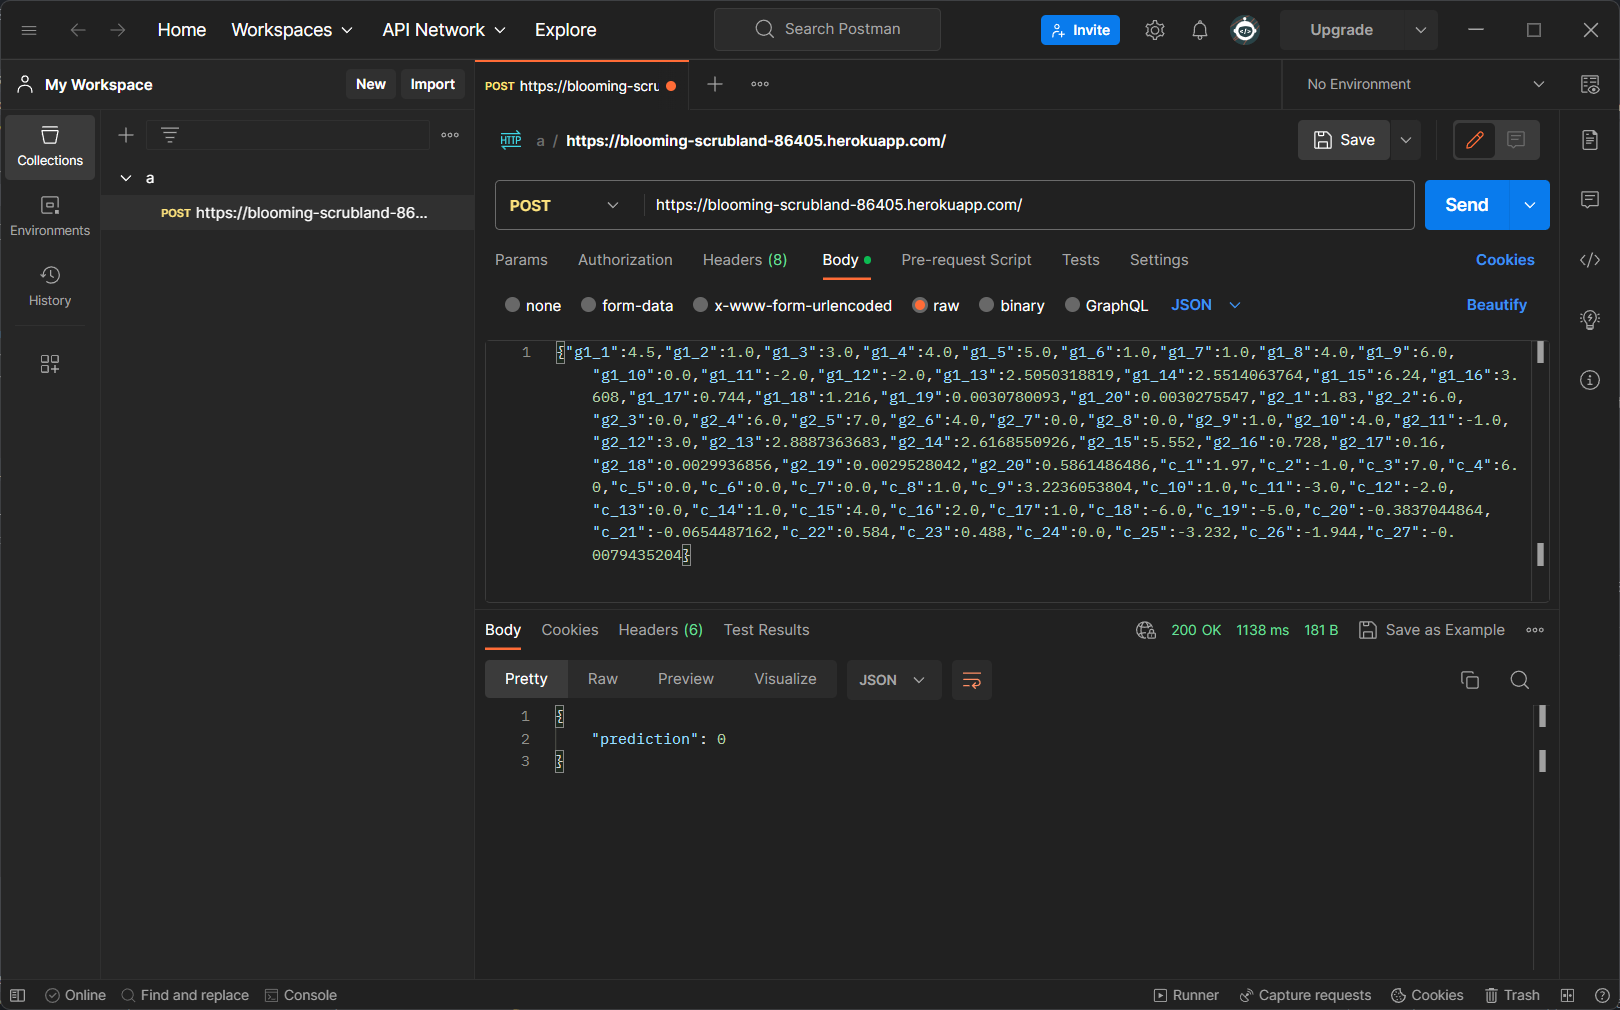

Results propobly could be better, if I could talk to the marketing team and learn more about the data. I could do more with the data, simply by having more knowledge about it, for example, using feature crosses or others. Besides, I could apply appropriate logic to the model, preventing, for example, mistakenly entering a value in a particular column in the wrong range.